In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv('../data/cleaned_df.csv')
df.drop(columns = ['Unnamed: 0'], inplace=True)

In [3]:
df.head()

,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,...,side_of_field_OAK,side_of_field_PHI,side_of_field_PIT,side_of_field_SD,side_of_field_SEA,side_of_field_SF,side_of_field_STL,side_of_field_TB,side_of_field_TEN,side_of_field_WAS
0,46.0,510.0,510.0,2310.0,1,0,8,0,2,2.0,...,0,0,0,0,0,0,0,1,0,0
1,5.0,499.0,1399.0,3199.0,1,0,1,1,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,80.0,348.0,348.0,2148.0,1,0,8,0,2,1.0,...,0,0,0,0,0,0,0,0,0,0
3,76.0,370.0,1270.0,3070.0,1,0,4,0,1,2.0,...,0,0,0,0,0,0,0,0,1,0
4,91.0,375.0,375.0,375.0,2,0,13,0,4,4.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
features = df.drop(columns=['play_type'])
features.head()

,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,...,side_of_field_OAK,side_of_field_PHI,side_of_field_PIT,side_of_field_SD,side_of_field_SEA,side_of_field_SF,side_of_field_STL,side_of_field_TB,side_of_field_TEN,side_of_field_WAS
0,46.0,510.0,510.0,2310.0,1,0,8,0,2,2.0,...,0,0,0,0,0,0,0,1,0,0
1,5.0,499.0,1399.0,3199.0,1,0,1,1,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,80.0,348.0,348.0,2148.0,1,0,8,0,2,1.0,...,0,0,0,0,0,0,0,0,0,0
3,76.0,370.0,1270.0,3070.0,1,0,4,0,1,2.0,...,0,0,0,0,0,0,0,0,1,0
4,91.0,375.0,375.0,375.0,2,0,13,0,4,4.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = features
y = df['play_type']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    stratify = y,
                                                    test_size = .2)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)

/Users/Joey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
X_train_ss = scaler.transform(X_train)
X_test_ss = scaler.transform(X_test)

/Users/Joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/Users/Joey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


## KNeighbors

In [9]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_ss, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [10]:
y_pred = classifier.predict(X_test_ss)

In [11]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[2515 1181   15    9    1]
 [1168 1484    8   10    1]
 [ 212  209   78    1    0]
 [ 222  197    4   68    0]
 [  78   54    4    1   53]]
              precision    recall  f1-score   support

           1       0.60      0.68      0.64      3721
           2       0.47      0.56      0.51      2671
           3       0.72      0.16      0.26       500
           4       0.76      0.14      0.23       491
           5       0.96      0.28      0.43       190

   micro avg       0.55      0.55      0.55      7573
   macro avg       0.70      0.36      0.41      7573
weighted avg       0.58      0.55      0.54      7573



## I want to find the best number of neighbors to use to see if I can get my error rate as low as possible

In [12]:
error = []

for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

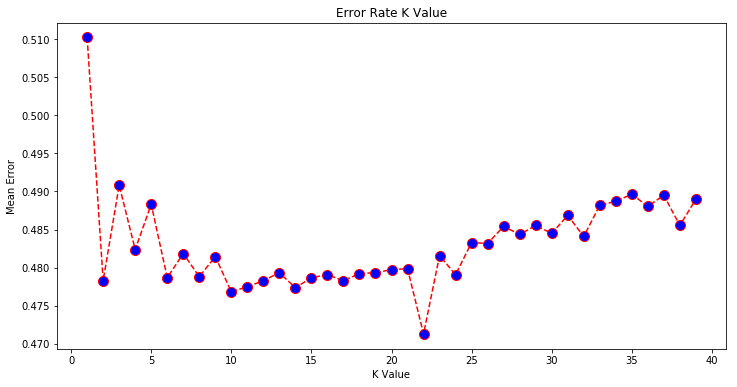

In [13]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [16]:
print(metrics.accuracy_score(y_test, y_pred))

0.5543377789515384


## Logistic Regression

In [18]:
logr = LogisticRegression()

In [19]:
logr.fit(X_train_ss, y_train)

/Users/Joey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Joey/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
preds = logr.predict(X_test_ss)

In [23]:
print(metrics.accuracy_score(y_test, preds))

0.8971345569787402


## Post Model EDA

In [28]:
# How many times these play types happened in the test set
y_test.value_counts()

1    3721
2    2671
3     500
4     491
5     190
Name: play_type, dtype: int64

In [26]:
# calculate null accuracy. we need to have a score higher than this number.
y_test.value_counts().head(1) / len(y_test)

1    0.491351
Name: play_type, dtype: float64

In [27]:
# print the first 25 true and predicted responses
print('True', y_test.values[0:25])
print('Pred', preds[0:25])

True [1 2 4 1 2 2 4 4 2 1 1 2 1 1 3 1 1 2 5 3 1 1 2 1 2]
Pred [1 2 4 1 2 2 4 4 2 1 1 2 1 1 3 2 1 2 5 3 1 1 2 2 2]


In [29]:
# this produces a 5x5 numpy array (matrix)
print(metrics.confusion_matrix(y_test, preds))

[[3257  464    0    0    0]
 [ 315 2356    0    0    0]
 [   0    0  500    0    0]
 [   0    0    0  491    0]
 [   0    0    0    0  190]]


In [93]:
# the only time the model was incorrect was due to passes vs running which makes sense
# because of this, I only want to look at the first two columns / first two rows
confusion = metrics.confusion_matrix(y_test, preds)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
# I will use these when we get down to specificity

In [94]:
# Classification Error. How often is the model incorrect?
classification_error = 1 - metrics.accuracy_score(y_test, preds)
classification_error

0.10286544302125977

In [45]:
# Sensitivity: When the actual value is positive, how often is the prediction correct?
# forced (average = 'macro') since I am using a multiclass classification
sensitivity = metrics.recall_score(y_test, preds, average = 'macro')
sensitivity

0.9514737959576773

In [50]:
# When the model predicts negative, how often is it correct?
specificity = TN / (TN + FP)
print(specificity)

0.875302338081161


In [95]:
# When the actual value is negative, how often is the prediction incorrect?
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)

0.12469766191883902


In [55]:
# When the model predicts positive, how often is it correct?
# forced average to = 'macro' since I am using a multiclass classification
precision = metrics.precision_score(y_test, preds, average = 'macro')
precision

0.9494550205300485

## Visualizations

In [66]:
# Class probabilities
y_pred_prob_passing = logr.predict_proba(X_test_ss)[:, 0]
y_pred_prob_running = logr.predict_proba(X_test_ss)[:, 1]
y_pred_prob_kickoff = logr.predict_proba(X_test_ss)[:, 2]
y_pred_prob_punt = logr.predict_proba(X_test_ss)[:, 3]
y_pred_prob_fieldgoal = logr.predict_proba(X_test_ss)[:, 4]

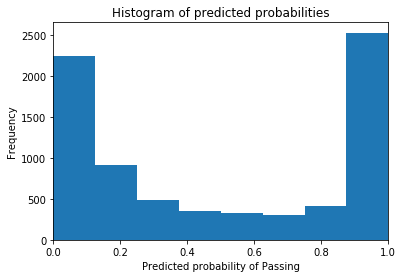

In [71]:
# histograms of predicted probabilities
# 8 bins
plt.hist(y_pred_prob_passing, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Passing')
plt.ylabel('Frequency');

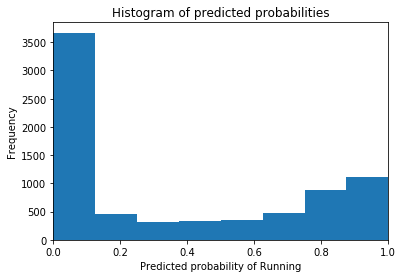

In [70]:
plt.hist(y_pred_prob_running, bins=8)

plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Running')
plt.ylabel('Frequency');

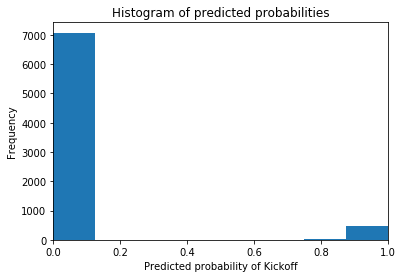

In [72]:
plt.hist(y_pred_prob_kickoff, bins=8)

plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Kickoff')
plt.ylabel('Frequency');

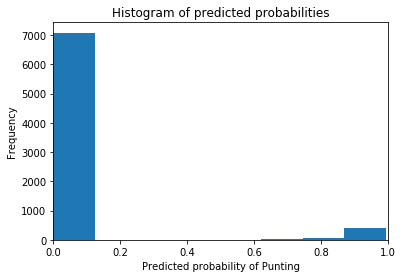

In [73]:
plt.hist(y_pred_prob_punt, bins=8)

plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Punting')
plt.ylabel('Frequency');

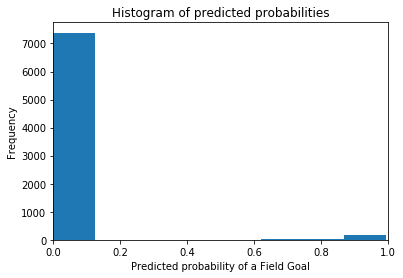

In [74]:
plt.hist(y_pred_prob_fieldgoal, bins=8)

plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of a Field Goal')
plt.ylabel('Frequency');